In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_path = "./data/"

df = pd.read_csv(data_path + "teste_indicium_precificacao.csv")

## Vamos primeiro fazer uma breve análise dos dados

In [120]:
# Temos que as colunas bairro_group, bairro, room_type são categóricas
df.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [121]:
df[df['nome'].str.contains('luxury', case=False, na=False)]['price'].mean()


np.float64(271.5721769499418)

In [122]:
df[df['nome'].str.contains('Lincoln', case=False, na=False)]['price'].mean()

np.float64(367.06666666666666)

In [123]:
df[df['nome'].str.contains('midtown', case=False, na=False)]['price'].mean()

np.float64(221.30146491904395)

In [124]:
df[df['nome'].str.contains('SuperBowl', case=False, na=False)]['price'].mean()

np.float64(1439.7058823529412)

In [125]:
df[df['nome'].str.contains('Film', case=False, na=False)]['price'].mean()

np.float64(1673.5)

In [126]:
df[df['nome'].str.contains('Event', case=False, na=False)]['price'].mean()

np.float64(1095.5555555555557)

In [127]:
df[df['nome'].str.contains('photo', case=False, na=False)]['price'].mean()

np.float64(955.6451612903226)

In [128]:
df[df['nome'].str.contains('Beautiful', case=False, na=False)]['price'].mean()

np.float64(153.34405649274225)

In [129]:
df.groupby('nome')['price'].mean().sort_values(ascending=False)[66:77]

nome
Unparalleled Luxury in Midtown Manhattan              2500.0
Architecturally Stunning Former Synagogue!            2500.0
SHOOTS ONLY - Huge Artist loft in Williamsburg        2500.0
Times Square 3BR Loft! Amazing Location!              2500.0
A Cozy Manhattan Sanctuary                            2500.0
Penthouse with Private Rooftop for Events/Shoots      2500.0
Beautiful Brooklyn Brownstone Production Space        2500.0
Paradise Garden, Spa, Steam & Massage Table #10299    2500.0
"The luxury of Comfort"                               2500.0
Loft                                                  2500.0
Private bedroom/Bathroom in a 2 bedroom apartment     2500.0
Name: price, dtype: float64

In [130]:
freq = {}
def get_freq_words(row):
    str_split = row.split()
    for string in str_split:
        if len(string) <= 2: 
            continue
        if not freq.get(string):
            freq[string] = 1
        else:
            freq[string] += 1
    return freq

df_caro = df[df['price'] > 5000]
df_caro['nome'].apply(lambda x: get_freq_words(str(x)))
freq_sorted = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
freq_sorted

{'Luxury': 4,
 'Manhattan': 2,
 'East': 2,
 '(Hidden': 2,
 'Airbnb)': 2,
 'Apartment': 2,
 'UWS': 1,
 '1BR': 1,
 'w/backyard': 1,
 'block': 1,
 'from': 1,
 'SuperBowl': 1,
 'Penthouse': 1,
 'Loft': 1,
 '3,000': 1,
 'sqft': 1,
 'SUPER': 1,
 'BOWL': 1,
 'Brooklyn': 1,
 'Duplex': 1,
 'Apt!!': 1,
 'Film': 1,
 'Location': 1,
 'Spanish': 1,
 'Harlem': 1,
 'Apt': 1,
 'Furnished': 1,
 'room': 1,
 'Astoria': 1,
 'apartment': 1,
 'Quiet,': 1,
 'Clean,': 1,
 'Lit': 1,
 'LES': 1,
 'Chinatown': 1,
 'townhouse': 1,
 'Greenwich': 1,
 'Village': 1,
 'bedroom': 1,
 'apt.': 1,
 '-stunning': 1,
 'views': 1,
 '1-BR': 1,
 'Lincoln': 1,
 'Center': 1,
 '72nd': 1,
 'Townhouse': 1,
 'Park': 1,
 'Avenue': 1,
 'Mansion': 1,
 'Beautiful/Spacious': 1,
 'bed': 1,
 'luxury': 1,
 'flat-TriBeCa/Soho': 1,
 'New': 1,
 'York': 1,
 'Hell’s': 1,
 'Kitchens': 1,
 '2br': 1,
 'The': 1,
 'Heart': 1,
 'NYC:': 1,
 'Manhattans': 1,
 'Lower': 1,
 'Side': 1,
 "70'": 1,
 'MotorYacht': 1,
 'the': 1,
 'Hudson': 1,
 'Midtown': 1,
 'gre

In [131]:
df['bairro_group'].value_counts()

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [132]:
# Com as informações dos dados, podemos observar que algumas colunas tem dados ausentes
# São elas: Nome, host_name, ultima_review e review_por_mes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [133]:
# Uma olhada nos atributos numéricos
df.describe()
# Podemos analisar na linha std (standard deviation). O valor na coluna price indica que os valores estão relativamente longes da média.
# Temos também possíveis outliers: A média de preço é 152.72, mas temos um valor máximo de 10000

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [134]:
# Vamos analisar as linhas que possuem o preço de 10k
df[df['price'] == 10000]
# Apenas 3 linhas possuem esses valores. Portanto, vale a pena testar a remoção de outliers no pré_processamento

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


<Axes: xlabel='longitude', ylabel='latitude'>

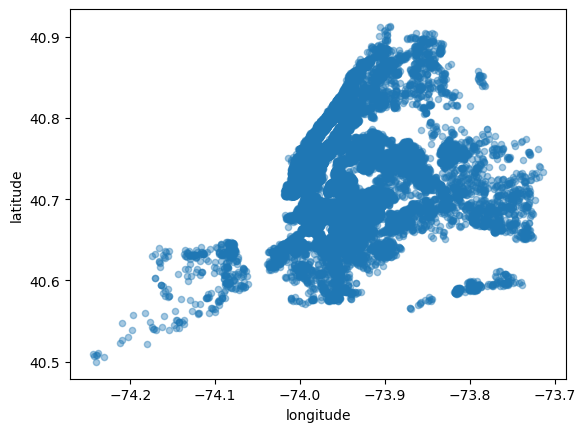

In [135]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
# Grande concentração de casas entre (-74.0, 40.6) e (-73.8, 40.9)
# Analisando o mapa de NY, isso significa que há maior disponibilidade de casas para aluguel fora de Staten Island.
# Isso já foi visto em df['bairro_group'].value_counts()


In [136]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [137]:
# Vamos agora em busca de correlações
# Vou retirar colunas claramente não influenciam no preço (id, nome, host_id, host_name, ultima_review)
df_filtered = df.drop(columns=['id', 'nome', 'host_id', 'host_name', 'ultima_review'])


In [138]:
df_filtered

,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
3,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
4,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...
48889,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48890,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48891,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48892,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [139]:
# Vamos aplicar o encoding. As colunas bairro_group, bairro, room_type serão convertidas para números
# Aqui, usarei OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
cols = ['bairro_group', 'bairro', 'room_type']
df_filtered[cols] = encoder.fit_transform(df_filtered[cols])

In [140]:
corr_matrix = df_filtered.corr()

In [141]:
corr_matrix['price'].sort_values(ascending=False)

price                            1.000000
disponibilidade_365              0.081833
bairro                           0.062057
calculado_host_listings_count    0.057472
bairro_group                     0.044246
minimo_noites                    0.042799
latitude                         0.033939
reviews_por_mes                 -0.030608
numero_de_reviews               -0.047954
longitude                       -0.150020
room_type                       -0.249351
Name: price, dtype: float64

In [142]:
encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria',
        'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace',
        'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater',
        'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont',
        'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park',
        'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale',
        'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick',
        'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
        'Castleton Corners', 'Chelsea', 'Chinatown', 'City Island',
        'Civic Center', 'Claremont Village', 'Clason Point', 'Clifton',
        'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point',
        'Columbia St', 'Concord', 'Concourse', 'Concourse Village',
        'Coney Island', 'Corona', 'Crown Heights', 'Cypress H

In [143]:
df_filtered.head()

,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2.0,127.0,40.75362,-73.98377,0.0,225,1,45,0.38,2,355
1,2.0,94.0,40.80902,-73.94190,1.0,150,3,0,NaN,1,365
2,1.0,41.0,40.68514,-73.95976,0.0,89,1,270,4.64,1,194
3,2.0,61.0,40.79851,-73.94399,0.0,80,10,9,0.10,1,0
4,2.0,137.0,40.74767,-73.97500,0.0,200,3,74,0.59,1,129


In [144]:
# Testarei algumas combinações de atributos que podem ter correlação com o preço
central_park_geo = {
    'latitude_min': 40.758112,
    'latitude_max': 40.807937,
    'longitude_min': -74,
    'longitude_max': -73.968656 
}
def prox_centralpark(row):
    cond1 = row['latitude'] >= central_park_geo['latitude_min'] and row['latitude'] <= central_park_geo['latitude_max']
    cond2 = row['longitude'] >= central_park_geo['longitude_min'] and row['longitude'] <= central_park_geo['longitude_max']
    if cond1 and cond2: 
        return 1
    return 0

df_filtered['near_central_park'] = df_filtered.apply(prox_centralpark, axis=1)


In [145]:
# Essa nova feature se relaciona mais com o preço do que bairro, bairro_group, minimo_noites
corr_matrix = df_filtered.corr()
corr_matrix['price'].sort_values(ascending=False)


price                            1.000000
near_central_park                0.093264
disponibilidade_365              0.081833
bairro                           0.062057
calculado_host_listings_count    0.057472
bairro_group                     0.044246
minimo_noites                    0.042799
latitude                         0.033939
reviews_por_mes                 -0.030608
numero_de_reviews               -0.047954
longitude                       -0.150020
room_type                       -0.249351
Name: price, dtype: float64

In [146]:
corr_matrix = df_filtered.corr()
corr_matrix['price'].sort_values(ascending=False)

price                            1.000000
near_central_park                0.093264
disponibilidade_365              0.081833
bairro                           0.062057
calculado_host_listings_count    0.057472
bairro_group                     0.044246
minimo_noites                    0.042799
latitude                         0.033939
reviews_por_mes                 -0.030608
numero_de_reviews               -0.047954
longitude                       -0.150020
room_type                       -0.249351
Name: price, dtype: float64

In [147]:
encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria',
        'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace',
        'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater',
        'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont',
        'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park',
        'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale',
        'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick',
        'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
        'Castleton Corners', 'Chelsea', 'Chinatown', 'City Island',
        'Civic Center', 'Claremont Village', 'Clason Point', 'Clifton',
        'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point',
        'Columbia St', 'Concord', 'Concourse', 'Concourse Village',
        'Coney Island', 'Corona', 'Crown Heights', 'Cypress H

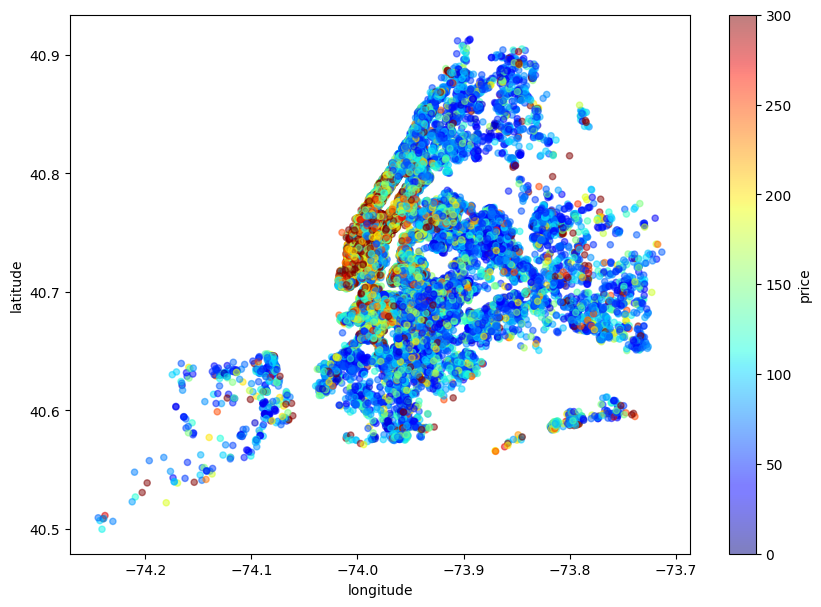

In [148]:
df_filtered.plot(kind="scatter", x="longitude", y="latitude", figsize = (10,7), c="price", colormap='jet', alpha=0.5, vmin=0, vmax=300)
plt.show()

In [149]:
df.groupby('bairro_group')['price'].mean()

bairro_group
Bronx             87.496792
Brooklyn         124.381983
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [150]:
df_filtered['price'].describe()

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [151]:
df_filtered['price'].mode()

0    100
Name: price, dtype: int64

In [152]:
df_filtered

,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,near_central_park
0,2.0,127.0,40.75362,-73.98377,0.0,225,1,45,0.38,2,355,0
1,2.0,94.0,40.80902,-73.94190,1.0,150,3,0,NaN,1,365,0
2,1.0,41.0,40.68514,-73.95976,0.0,89,1,270,4.64,1,194,0
3,2.0,61.0,40.79851,-73.94399,0.0,80,10,9,0.10,1,0,0
4,2.0,137.0,40.74767,-73.97500,0.0,200,3,74,0.59,1,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48889,1.0,13.0,40.67853,-73.94995,1.0,70,2,0,NaN,2,9,0
48890,1.0,28.0,40.70184,-73.93317,1.0,40,4,0,NaN,2,36,0
48891,2.0,94.0,40.81475,-73.94867,0.0,115,10,0,NaN,1,27,0
48892,2.0,95.0,40.75751,-73.99112,2.0,55,1,0,NaN,6,2,0


In [153]:
df[df['bairro_group'] == 'Manhattan']['room_type'].value_counts()

room_type
Entire home/apt    13199
Private room        7982
Shared room          480
Name: count, dtype: int64

In [154]:
df[df['bairro_group'] == 'Brooklyn']['room_type'].value_counts()

room_type
Private room       10131
Entire home/apt     9559
Shared room          413
Name: count, dtype: int64

In [155]:
df[df['bairro_group'] == 'Bronx']['room_type'].value_counts()

room_type
Private room       652
Entire home/apt    379
Shared room         60
Name: count, dtype: int64

In [156]:
df[df['bairro_group'] == 'Staten Island']['room_type'].value_counts()

room_type
Private room       188
Entire home/apt    176
Shared room          9
Name: count, dtype: int64